# Հայաստանի Ազգային ժողովի պատգամավորների տարիքն ըստ գումարման

## Բեռնել տվյալները ԱԺ կայքից

In [1]:
from bs4 import BeautifulSoup
import requests
import datetime

In [2]:
seasons = {
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=100':  [datetime.date(1991, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=1': [datetime.date(1995, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=2': [datetime.date(1999, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=3': [datetime.date(2003, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=4': [datetime.date(2007, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=5': [datetime.date(2012, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=6': [datetime.date(2017, 1, 1)],
    'http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=7': [datetime.date(2018, 1, 1)],
    
}

In [3]:
def from_dob_to_age(born, today):
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [4]:
for season_url in seasons:
    urls = []
    r = requests.get(season_url)
    soup = BeautifulSoup(r.content, 'html.parser')
    As = soup.select('.dep_name_list a')
    for a in As:
        urls.append("http://parliament.am" + a['href'])
    ages = []
    for url in urls:
        if 'PartyName' in url:
            continue
        r = requests.get(url)
        soup = BeautifulSoup(r.content, 'html.parser')
        description_2 = soup.find_all('div', {'class': 'description_2'})
        if '{$BirthDate}' == description_2[1].text:
            continue
        d, m, y = description_2[1].text.split('.')
        d, m, y = int(d), int(m), int(y)
        if m == 0:
            m = 1
        if d == 0:
            d = 1
        ages.append(from_dob_to_age(datetime.date(y, m, d), seasons[season_url][0]))
    seasons[season_url].append(ages)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


## Պատկերել

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

gums = [np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=100'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=1'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=2'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=3'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=4'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=5'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=6'][1]),
        np.array(seasons['http://parliament.am/deputies.php?lang=arm&sel=&ord=&show_session=7'][1])]

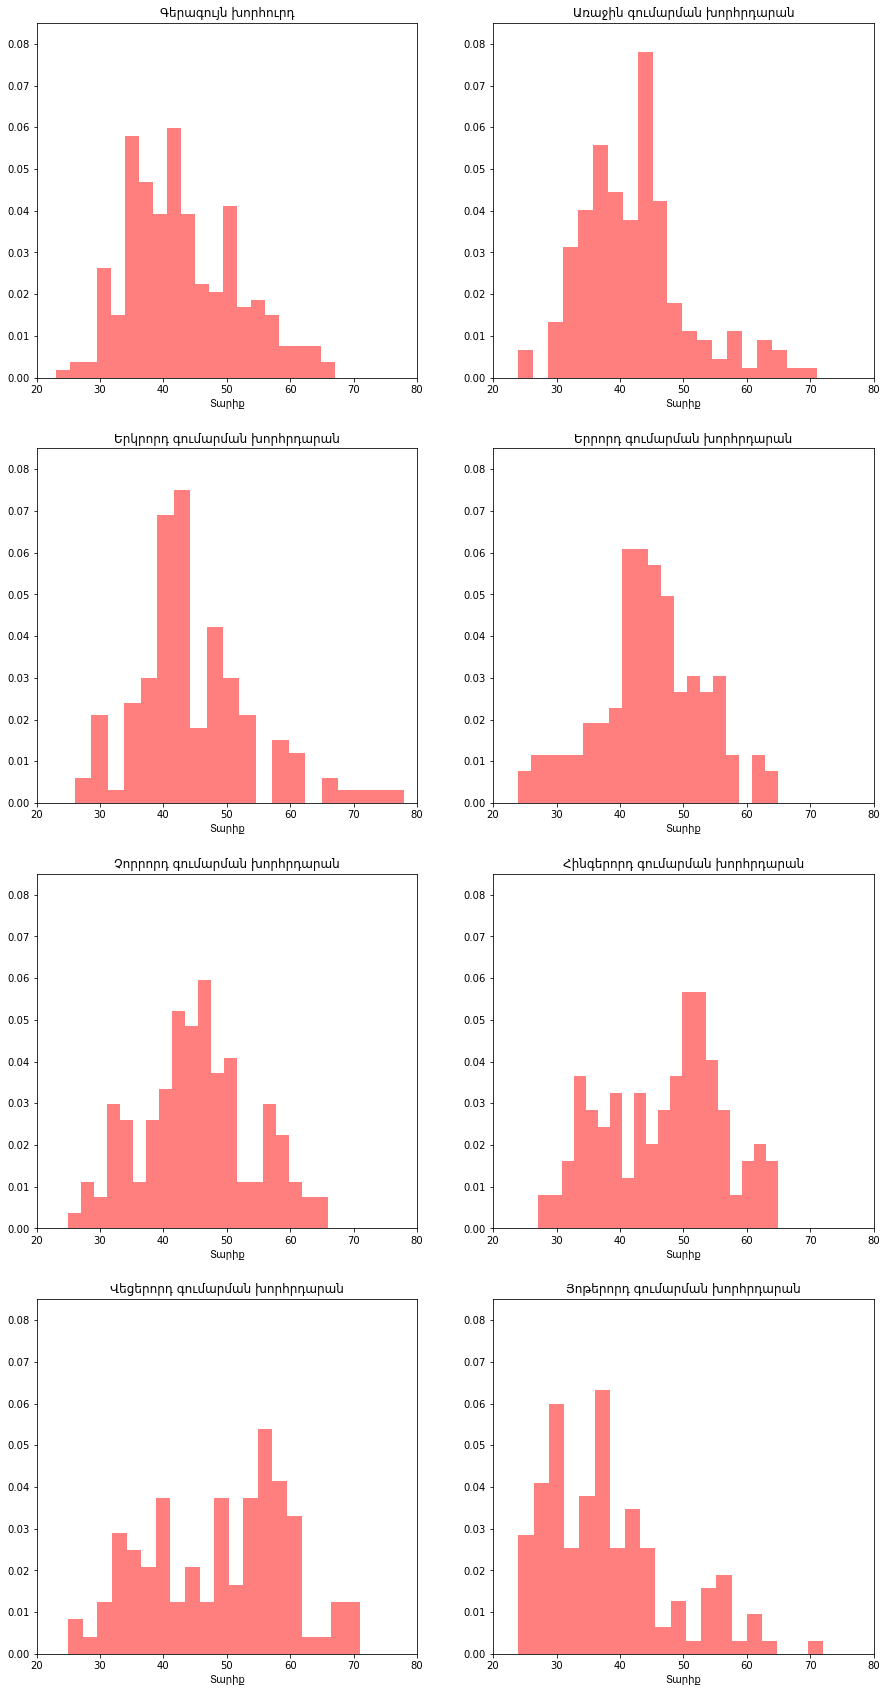

In [10]:
fig, ax = plt.subplots(4,2)
plt.subplots_adjust(hspace=0.2)
bins = 20
fig.set_size_inches(15, 30)
gums = [gum0, gum1, gum2, gum3, gum4, gum5, gum6, gum7]


ax[0][0].hist(gum0, bins, alpha = 0.5, color = 'r', density=True)
ax[0][0].set_title('Գերագույն խորհուրդ')
ax[0][0].set_xlabel('Տարիք')

ax[0][1].hist(gum1, bins, alpha = 0.5, color = 'r', density=True)
ax[0][1].set_title('Առաջին գումարման խորհրդարան')
ax[0][1].set_xlabel('Տարիք')

ax[1][0].hist(gum2, bins, alpha = 0.5, color = 'r', density=True)
ax[1][0].set_title('Երկրորդ գումարման խորհրդարան')
ax[1][0].set_xlabel('Տարիք')

ax[1][1].hist(gum3, bins, alpha = 0.5, color = 'r', density=True)
ax[1][1].set_title('Երրորդ գումարման խորհրդարան')
ax[1][1].set_xlabel('Տարիք')

ax[2][0].hist(gum4, bins, alpha = 0.5, color = 'r', density=True)
ax[2][0].set_title('Չորրորդ գումարման խորհրդարան')
ax[2][0].set_xlabel('Տարիք')

ax[2][1].hist(gum5, bins, alpha = 0.5, color = 'r', density=True)
ax[2][1].set_title('Հինգերորդ գումարման խորհրդարան')
ax[2][1].set_xlabel('Տարիք')

ax[3][0].hist(gum6, bins, alpha = 0.5, color = 'r', density=True)
ax[3][0].set_title('Վեցերորդ գումարման խորհրդարան')
ax[3][0].set_xlabel('Տարիք')

ax[3][1].hist(gum7, bins, alpha = 0.5, color = 'r', density=True)
ax[3][1].set_title('Յոթերորդ գումարման խորհրդարան')
ax[3][1].set_xlabel('Տարիք')
plt.setp(ax, xlim=(20, 80), ylim=(0, 0.085))
plt.savefig('parlament_ages.png',bbox_inches='tight', facecolor='white')
plt.show()

In [7]:
for gum in gums:
    print(gum.mean(), gum.std(), stats.trim_mean(gum, 0.05))

42.958847736625515 8.6404133411088 42.67579908675799
42.31413612565445 8.286477924927935 41.86705202312139
44.7578125 9.32465322222997 44.25
44.890625 8.21415924543559 44.956896551724135
45.2442748091603 8.56327290203395 45.21008403361345
46.93846153846154 9.383089409352621 46.95762711864407
48.7047619047619 10.985638945393607 48.71578947368421
38.053030303030305 10.013108373632637 37.46666666666667
